In [75]:
import tensorflow as tf
import numpy as np
import pandas as pd
import csv
import json
from sklearn.model_selection import train_test_split
import plotly.express as px
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [76]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2.1

## Load data:

In [77]:
df_1 = pd.read_csv('/content/gdrive/My Drive/fashion/All_Beauty.csv', usecols=['overall', 'reviewText'])
df_2 = pd.read_csv('/content/gdrive/My Drive/fashion/AMAZON_FASHION.csv', usecols=['overall', 'reviewText'])
df_3 = pd.read_csv('/content/gdrive/My Drive/fashion/Arts_Crafts_and_Sewing.csv', usecols=['overall', 'reviewText'])
df_4 = pd.read_csv('/content/gdrive/My Drive/fashion/Clothing_Shoes_and_Jewelry_5.csv', usecols=['overall', 'reviewText'])
df_5 = pd.read_csv('/content/gdrive/My Drive/fashion/Sports_and_Outdoors_5.csv', usecols=['overall', 'reviewText'])
df_6 = pd.read_csv('/content/gdrive/My Drive/fashion/Grocery_and_Gourmet_Food_5.csv', usecols=['overall', 'reviewText'])
df_test = pd.read_csv('/content/gdrive/My Drive/fashion/Luxury_Beauty_5.csv', usecols=['overall', 'reviewText'])

### 2.1.1

In [78]:
print(f'All Beauty consist of: {len(df_1)} reviews')
print(f'Amazon Fashion consist of: {len(df_2)} reviews')
print(f'Arts Crafts and Sewing consist of: {len(df_3)} reviews')
print(f'Clothing Shoes and Jewelry of: {len(df_4)} reviews')
print(f'Sports and Outdoors consist of: {len(df_5)} reviews')
print(f'Grocery and Gourmet Food consist of: {len(df_6)} reviews')

All Beauty consist of: 371345 reviews
Amazon Fashion consist of: 883636 reviews
Arts Crafts and Sewing consist of: 1000000 reviews
Clothing Shoes and Jewelry of: 1000000 reviews
Sports and Outdoors consist of: 1000000 reviews
Grocery and Gourmet Food consist of: 1000000 reviews


# 2.2

## Analysis for training data:

### 2.2.1

**Boxplot categories:**

In [79]:
def copy_and_sample(df, n=10000):
    if len(df) > n:
        return df.sample(n)
    else:
        return df.copy()

df_1_stats = copy_and_sample(df_1)
df_2_stats = copy_and_sample(df_2)
df_3_stats = copy_and_sample(df_3)
df_4_stats = copy_and_sample(df_4)
df_5_stats = copy_and_sample(df_5)
df_6_stats = copy_and_sample(df_6)

df_1_stats['wordCount'] = df_1_stats['reviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df_2_stats['wordCount'] = df_2_stats['reviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df_3_stats['wordCount'] = df_3_stats['reviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df_4_stats['wordCount'] = df_4_stats['reviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df_5_stats['wordCount'] = df_5_stats['reviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df_6_stats['wordCount'] = df_6_stats['reviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

df_1_stats['category'] = 'all_beauty'
df_2_stats['category'] = 'amazon_fashion'
df_3_stats['category'] = 'arts_arafts_and_sewing'
df_4_stats['category'] = 'clothing_shoes_and_jewelry'
df_5_stats['category'] = 'sports_and_outdoors'
df_6_stats['category'] = 'grocery and gourmet food'

box_plot_df = pd.concat([df_1_stats, df_2_stats, df_3_stats, df_4_stats, df_5_stats, df_6_stats])

fig = px.box(box_plot_df, x="category", y="wordCount", points="all", color="category")

fig.update_layout(
    title='Word Count Distribution by Category:',
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey'),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey'),
    plot_bgcolor="#FFFFFF")

fig.update_yaxes(range=[0, 300])

fig.show()

### 2.2.2

**Correlation matrix:**

In [80]:
nltk.download('punkt')
nltk.download('stopwords')

def tokenize_and_lowercase(df, column_name):

    stop_words = set(stopwords.words('english'))

    all_words = []
    for text in df[column_name]:
        if isinstance(text, str):
            words = word_tokenize(text.lower())
            all_words.extend([word for word in words if word.isalpha() and word not in stop_words])

    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(2000)
    return most_common_words

all_beauty_WORDS = tokenize_and_lowercase(df_1_stats, 'reviewText')
amazon_fashion_WORDS = tokenize_and_lowercase(df_2_stats, 'reviewText')
arts_crafts_and_sewing_WORDS = tokenize_and_lowercase(df_3_stats, 'reviewText')
clothing_shoes_and_jewelry_WORDS = tokenize_and_lowercase(df_4_stats, 'reviewText')
sports_and_outdoors_WORDS = tokenize_and_lowercase(df_5_stats, 'reviewText')
grocery_and_gourmet_food_WORDS = tokenize_and_lowercase(df_6_stats, 'reviewText')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
def list_to_dict(lst):
    return dict(lst)

all_beauty_WORDS_dict = list_to_dict(all_beauty_WORDS)
amazon_fashion_WORDS_dict = list_to_dict(amazon_fashion_WORDS)
arts_crafts_and_sewing_WORDS_dict = list_to_dict(arts_crafts_and_sewing_WORDS)
clothing_shoes_and_jewelry_WORDS_dict = list_to_dict(clothing_shoes_and_jewelry_WORDS)
sports_and_outdoors_WORDS_dict = list_to_dict(sports_and_outdoors_WORDS)
grocery_and_gourmet_food_WORDS_dict = list_to_dict(grocery_and_gourmet_food_WORDS)

def count_common_keys_percentage(dict_a, dict_b):
    common_keys = len(set(dict_a.keys()) & set(dict_b.keys()))
    total_unique_keys = len(set(dict_a.keys()) | set(dict_b.keys()))
    if total_unique_keys > 0:
        return round((common_keys / total_unique_keys) * 100)
    else:
        return 0

def create_correlation_matrix(dict_list, dict_names):
    matrix = []

    for dict_a in dict_list:
        row = []
        for dict_b in dict_list:
            row.append(count_common_keys_percentage(dict_a, dict_b))
        matrix.append(row)

    df = pd.DataFrame(matrix, index=dict_names, columns=dict_names)
    return df

dicts = [all_beauty_WORDS_dict, amazon_fashion_WORDS_dict, arts_crafts_and_sewing_WORDS_dict, clothing_shoes_and_jewelry_WORDS_dict, sports_and_outdoors_WORDS_dict, grocery_and_gourmet_food_WORDS_dict]
dict_names = ['All Beauty', 'Amazon Fashion', 'Arts Crafts and Sewing', 'Clothing Shoes and Jewelry', 'Sports and Outdoors', 'Grocery and Gourmet Food']

correlation_matrix = create_correlation_matrix(dicts, dict_names)
correlation_matrix

,All Beauty,Amazon Fashion,Arts Crafts and Sewing,Clothing Shoes and Jewelry,Sports and Outdoors,Grocery and Gourmet Food
All Beauty,100,48,51,48,47,41
Amazon Fashion,48,100,49,63,49,34
Arts Crafts and Sewing,51,49,100,50,51,36
Clothing Shoes and Jewelry,48,63,50,100,52,35
Sports and Outdoors,47,49,51,52,100,35
Grocery and Gourmet Food,41,34,36,35,35,100


### 2.2.3

**Common words:**

In [82]:
combined_words = all_beauty_WORDS + amazon_fashion_WORDS + arts_crafts_and_sewing_WORDS + clothing_shoes_and_jewelry_WORDS + sports_and_outdoors_WORDS

combined_word_counts = Counter()
for word, count in combined_words:
    combined_word_counts[word] += count

top_20_words = combined_word_counts.most_common(20)

grocery_and_gourmet_food_WORDS_counts = Counter()
for word, count in grocery_and_gourmet_food_WORDS:
    grocery_and_gourmet_food_WORDS_counts[word] += count

top_20_words_food = grocery_and_gourmet_food_WORDS_counts.most_common(20)

print(f' For all categories the 20 most common words are: {top_20_words}')
print(f' For Grocery and Gourmet Food the 20 most common words are: {top_20_words_food}')

 For all categories the 20 most common words are: [('great', 12137), ('good', 8072), ('like', 7963), ('love', 7020), ('one', 6745), ('would', 6452), ('use', 6409), ('well', 6401), ('product', 5917), ('fit', 5568), ('size', 5000), ('get', 4762), ('nice', 4625), ('really', 4324), ('quality', 4185), ('little', 4065), ('time', 3931), ('price', 3845), ('bought', 3614), ('perfect', 3485)]
 For Grocery and Gourmet Food the 20 most common words are: [('good', 2939), ('great', 2517), ('like', 2464), ('taste', 2106), ('love', 1856), ('flavor', 1806), ('tea', 1530), ('coffee', 1522), ('one', 1400), ('product', 1379), ('use', 1114), ('would', 987), ('really', 980), ('get', 924), ('much', 881), ('price', 856), ('buy', 832), ('best', 801), ('time', 765), ('delicious', 757)]


### 2.2.4

**Boxplot all categories:**

In [83]:
box_plot_df = pd.concat([df_1_stats, df_2_stats, df_3_stats, df_4_stats, df_5_stats])

fig = px.box(box_plot_df, y="wordCount", points="all")

fig.update_layout(
    title='Word Count Distribution by Category:',
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey'),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey'),
    plot_bgcolor="#FFFFFF")

fig.update_yaxes(range=[0, 300])

fig.show()

### 2.2.5

**Length of balanced training data:**

In [84]:
df_train = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0, ignore_index=True)
df_train = df_train.dropna()
len(df_train)

4251611

### 2.2.6

**Categorize binary - negative or positive:**

In [85]:
df_test = df_test.dropna()

df_train = df_train[df_train["overall"] != '3']
df_train["label"] = df_train["overall"].apply(lambda rating : 1 if str(rating) > '3' else 0)

df_test = df_test[df_test["overall"] != '3']
df_test["label"] = df_test["overall"].apply(lambda rating : 1 if str(rating) > '3' else 0)

**Example of one review:**

In [86]:
print(f'First review = {df_train.loc[0, "reviewText"]}')
print(f'First review has length = {len(df_train.loc[0, "reviewText"])}\n ')
print(f'First review overall rating = {df_train.loc[0, "overall"]}')
print(f'First review binary rating = {df_train.loc[0, "label"]}')

First review = great
First review has length = 5
 
First review overall rating = 1
First review binary rating = 0


### 2.2.7

**Distribution of labels:**

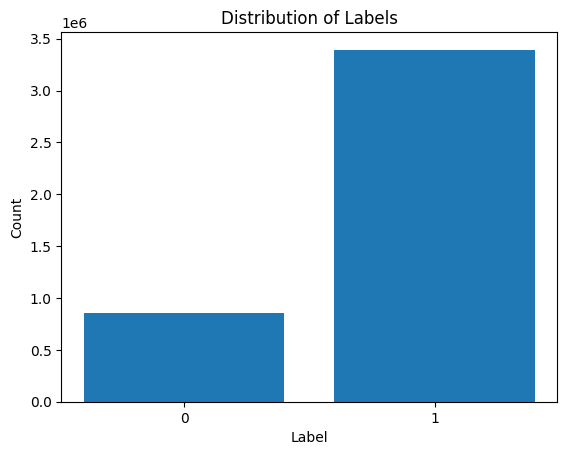

In [87]:
label_counts = df_train['label'].value_counts()

plt.bar(label_counts.index, label_counts.values)

plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

In [88]:
label_counts = df_train['label'].value_counts()

print(label_counts)

total_count = label_counts[0] + label_counts[1]

percentage_0 = (label_counts[0] / total_count) * 100
percentage_1 = (label_counts[1] / total_count) * 100

print(f"Percentage of negative sentiment (0 label): {percentage_0:.2f}%, percentage of positive sentiment (1 label): {percentage_1:.2f}%")

1    3393359
0     858252
Name: label, dtype: int64
Percentage of negative sentiment (0 label): 20.19%, percentage of positive sentiment (1 label): 79.81%


### 2.2.8










**Initial analysis - balanced or unbalanced data?**


**Preprocessing of review text:**

In [89]:
df_train_svm = df_train.sample(200000)

def preprocess_text(text):

    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df_train_svm['processed_review'] = df_train_svm['reviewText'].apply(preprocess_text)

**Split into train and validation data and vectorize the words:**

In [90]:
X = df_train_svm['processed_review']
y = df_train_svm['label']

X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

**Example of vectorized words for a review:**

In [91]:
example_index = 11
example_text = X_train.iloc[example_index]
example_vector = X_train_tfidf[example_index]

print("Original Text Example:")
print(example_text)
print("\nTF-IDF Vector Representation:")
print(example_vector)

print(X_train_tfidf.shape)
print(X_val_tfidf.shape)

Original Text Example:
fit littl awkward seem though meant fit matern dress skirt much extra room belli area back tighter appear photo unfortun return

TF-IDF Vector Representation:
  (0, 3610)	0.17775274684904235
  (0, 4689)	0.2361908530815742
  (0, 3198)	0.22736560707964282
  (0, 316)	0.22312200097303003
  (0, 4494)	0.2745047056957042
  (0, 499)	0.2755210183720053
  (0, 1652)	0.19794650466291544
  (0, 2873)	0.14430069043957303
  (0, 3968)	0.25713434917574235
  (0, 1445)	0.19134340903393643
  (0, 2723)	0.33291672661933014
  (0, 2735)	0.26990806169789777
  (0, 4469)	0.1758435918223255
  (0, 3799)	0.16342254749806023
  (0, 405)	0.2787453275565798
  (0, 2595)	0.13570104300725763
  (0, 1755)	0.2196203064221485
  (0, 3660)	0.20709310400672268
  (0, 336)	0.20785660378954326
  (0, 411)	0.1593367848365135
(160000, 5000)
(40000, 5000)


**Sort out data for balanced dataset and train:**

In [92]:
df_label_0 = df_train_svm[df_train_svm['label'] == 0]
df_label_1 = df_train_svm[df_train_svm['label'] == 1]

balanced_df_train = pd.concat([df_label_0.sample(n=40000, random_state=42),
                               df_label_1.sample(n=40000, random_state=42)])

X_balanced = vectorizer.transform(balanced_df_train['processed_review'])
y_balanced = balanced_df_train['label']

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

model_svm_balanced = SVC(kernel='linear')
model_svm_balanced.fit(X_train_balanced, y_train_balanced)

SVC(kernel='linear')

**Sort out data for unbalanced dataset and train:**

In [93]:
unbalanced_df_train = df_train_svm.sample(n=80000, random_state=42)

X_unbalanced = vectorizer.transform(unbalanced_df_train['processed_review'])
y_unbalanced = unbalanced_df_train['label']

X_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(X_unbalanced, y_unbalanced, test_size=0.2, random_state=42)

model_svm_unbalanced = SVC(kernel='linear')
model_svm_unbalanced.fit(X_train_unbalanced, y_train_unbalanced)

SVC(kernel='linear')

**Test model trained on balanced data and print classification report:**

In [94]:
predictions_svm_balanced_val = model_svm_balanced.predict(X_val_tfidf)
print(classification_report(Y_val, predictions_svm_balanced_val))

              precision    recall  f1-score   support

           0       0.55      0.86      0.67      8068
           1       0.96      0.82      0.89     31932

    accuracy                           0.83     40000
   macro avg       0.76      0.84      0.78     40000
weighted avg       0.88      0.83      0.84     40000



**Test model trained on unbalanced data and print classification report:**

In [95]:
predictions_svm_unbalanced_val = model_svm_unbalanced.predict(X_val_tfidf)
print(classification_report(Y_val, predictions_svm_unbalanced_val))

              precision    recall  f1-score   support

           0       0.82      0.60      0.69      8068
           1       0.91      0.97      0.93     31932

    accuracy                           0.89     40000
   macro avg       0.86      0.78      0.81     40000
weighted avg       0.89      0.89      0.89     40000



### 2.2.9


**The final - balanced dataset - for further analysis:**

In [96]:
df_label_0 = df_train[df_train['label'] == 0]
length = len(df_label_0)
df_label_1 = df_train[df_train['label'] == 1].sample(n=length, random_state=42)
df_final = pd.concat([df_label_0, df_label_1], axis=0)

df_final_sample = df_final.sample(10000)

df_final_sample['wordCount'] = df_final_sample['reviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

fig_ = px.box(df_final_sample, y="wordCount", points="all")

fig.update_layout(
    title='Word Count Distribution by Category:',
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey'),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGrey'),
    plot_bgcolor="#FFFFFF")

fig_.update_yaxes(range=[0, 300])

fig_.show()

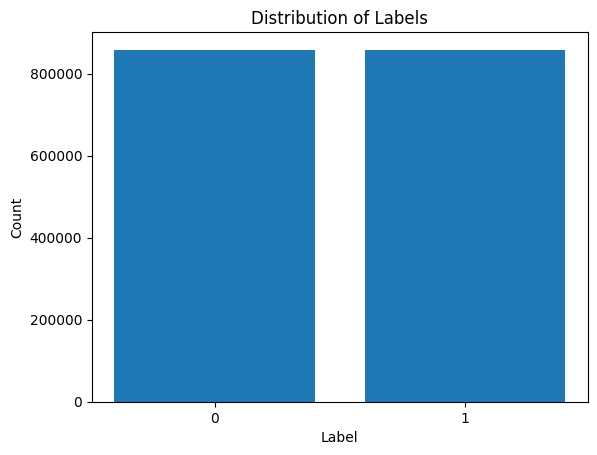

1716504

In [97]:
label_counts = df_final['label'].value_counts()

plt.bar(label_counts.index, label_counts.values)

plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

len(df_final)